# Working with Digital Herbarium using Python

[Python](http://python.org) programming language is a popular tool for speaking with a computer. It is a common purpose programming language widely used not only in programming field, but also in scientific computations, data analysis and engeneering.

Among reasons Python beign popular are its programming productivity, code readability, obvious simplicity, as well as dynamic typing, supporting [OOPs](https://en.wikipedia.org/wiki/Object-oriented_programming) coding style, cross-platform runability etc.

When writting in Python, there are almost no chances to get unreadable code. Every block of the program is separated from others by predefined number of spaces that leads to an easy-to-read textual document. There are recommendations on how to write Python code [pep8](https://www.python.org/dev/peps/pep-0008/). Pep8 document aims at writting readable and easy understandable Python code.

Reproducing computations presented below assumes Python 3.5+ to be installed in your operational system, as well some Python packages (e.g. [Pandas](http://pandas.pydata.org), [NumPy](http://numpy.org) etc.); 
To get working trough the experiments on spatially distributed data, you will need additionally to install `pyshp`  (a tool for I/O operations with ESRI shape files) and `shapely` (geometry primitives and interactions) packages.

Windows users can start with [Anaconda](https://www.continuum.io/downloads) distribution. This distribution was designed to provide a convenient toolset for scientific computations and data analysis on top of Python, so it could be a good starting point in the way of building computational environment for your investigations.

Executable lines of code are given in `In[xxx]`-started blocks; these blocks could be executed either in [Jupyter](http://jupyter.org/) interactive environment or by coping them into a separate text file (with `.py` extension) and running with Python interpreter.

This document is created using [Jupyter](http://jupyter.org/) software, interactive environment that allows mixing code and text in pretty-styled way.

## Making simple queries

To get started, we need to prepare computational environment. The most important component of it, is the [Pandas](http://pandas.pydata.org) package; It is highly recommmended to install it before doing any manipulation with data. Being Pandas installed, it supply us with a good and convienient data container -- the DataFrame class, that, in turn, allows to make sofphisticated data selection and perform basic input and output (IO) operations.

We assume that the Pandas has been already installed. So, lets do importing it.

In [1]:
import pandas as pd  # This is an implicit agreement: everytime you need pandas, it is better to import it as `pd`.

Lets define variable called `HERBARIUM_SEARCH_URL`. This variable will point to the URI, where we will send HTTP search quieries. This URI assumed to be a permanent address, so, it probably willn't be changed in the nearest future.

Note: Оne can use HTTPS protocol instead. In this case just replace `http` with `https` in `HERBARIUM_SEARCH_URL`.

In [2]:
HERBARIUM_SEARCH_URL = 'http://botsad.ru/hitem/json/'

It is worth noting that variable's naming is very important part of any programming process. One can think that it isn't so important, and would use shorthand notations instead, bearing in mind that everything will be clear, at least, for myself. But this isn't a good reason to do so, even if you are writting code just to yourself. Best practice in this case assumes to choose variable names to be clear for everyone (in an intuitive way) on the one hand, and to be as short as possible on the other.

Let us organize search parameters in a list of tuples, as follows
(to get full description of all available search parameters follow through the [link](https://github.com/VBGI/herbs/blob/master/herbs/docs/httpapi/ru/http_api.rst)):

In [3]:
search_parameters_set = (('collectedby', 'Bakalin'),
                         ('identifiedby', 'Bakalin'),
                         ('colstart', '2016-01-01'),
                         ('colend', '2016-12-30')
                         )

Let's do importing necessary set of functions to make TTP-requests automatically. Python's ecosystem provides a lot of tools to do this: one can use third party packages, or just use ones included in the Python (a.k.a "battarie included" pack) standard distributive.

In [4]:
try:
    # Python 3.x
    from urllib.parse import quote
    from urllib.request import urlopen
except ImportError:
    # Python 2.x
    from urllib import quote
    from urllib import urlopen

Now, we can use defined variables to compose search URI (according to http-api [rules](https://github.com/VBGI/herbs/blob/master/herbs/docs/httpapi/en/http_api.rst)):

In [5]:
search_request_url = HERBARIUM_SEARCH_URL + '?' + '&'.join(map(lambda x: x[0] + '=' + quote(x[1].strip()), search_parameters_set))

According to the [URI specification](https://tools.ietf.org/html/rfc3986#page-11) non-ASCII characters used in the URI should be encoded using symbol '%'. So, if your query will include non-ascii chars, you will need to use helper function `quote` to do such encoding.

In case of simple quieries, one can assign `search_request_url` directly, e.g.:
```python
search_request_url = http://botsad.ru/hitem/json?collectedby=bakalin
```

This way is your choice, but best practice scripting assumes that you will divide process of building the `search_request_url`. Using `search_parameters_set` allows you to be more structured and organized in case of, for instance, making complicated searching queries, performing a set of cosequent quieries with different parameter sets etc.: 

```python
list_of_search_pars = [search_parameters_set1, search_parameters_set2, search_parameters_set3,]

list_of_search_urls = [search_request_url1, search_request_url2, search_request_url3, ]
```

For the sake of self-checking, one can print out the current value of the `search_request_url`. 

In [6]:
search_request_url

'http://botsad.ru/hitem/json/?collectedby=Bakalin&identifiedby=Bakalin&colstart=2016-01-01&colend=2016-12-30'

Now, we are ready to make searching request to the server. In general,  data loading and its transformation into Python dictionary consist of the following four lines of code:

In [7]:
import json
server_response = urlopen(search_request_url)
data = json.loads(server_response.read().decode('utf-8'))
server_response.close()

So, the variable `data` stores Python dictionary with fields defined in [official docs](https://github.com/VBGI/herbs/blob/master/herbs/docs/httpapi/en/http_api.rst).

Getting started the data evaluation, one should check `errors` and `warnings` fields; If everything went fine, these variables are leaved empty, or just `warnings` is non-empty.

In [8]:
data['errors'], data['warnings']

([], [])

Therefore, data was successfully loaded, and we can start typical data evaluation process using [Pandas](http://pandas.pydata.org/).

In [9]:
print("The number of obtained records is ", len(data['data']))

The number of obtained records is  143


Now, `data['data']` is a Python dictionary; Python dictionaries are convenient containers for structured data, but Pandas DataFrame is more appropriate for this purpose.
Let us convert the dictionary to the DataFrame object; it is quite simple:

In [10]:
search_df = pd.DataFrame(data['data'])

`search_df` is an instance of the DataFrame class, that has a lot of helper methods to get information about the data. Such of that are `.info()` and `.describe()` methods; They are used to get common information about the data.

In [11]:
search_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 36 columns):
acronym                    143 non-null object
additionals                143 non-null object
altitude                   143 non-null object
branch                     143 non-null object
collection_finished        143 non-null object
collection_started         143 non-null object
collectors                 143 non-null object
country                    143 non-null object
country_id                 141 non-null float64
created                    143 non-null object
details                    143 non-null object
dethistory                 143 non-null object
devstage                   143 non-null object
district                   143 non-null object
family                     143 non-null object
family_authorship          143 non-null object
fieldid                    143 non-null object
genus                      143 non-null object
genus_authorship           143 non-null object
g

Also, one can inspect your DataFrame's content:

In [12]:
search_df

,acronym,additionals,altitude,branch,collection_finished,collection_started,collectors,country,country_id,created,...,latitude,longitude,note,region,species_authorship,species_epithet,species_fullname,species_id,species_status,updated
0,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,22.348611,103.767500,"SaPa, Phan Xi Pan National Park.",Lao Cai Province,(Austin) Stephani,subciliata,Pallavicinia subciliata (Austin) Stephani,420693,Approved,2017-06-13
1,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,22.348611,103.767500,"SaPa, Phan Xi Pan National Park[Vietnam]",Lao Cai Province,(Austin) Stephani,subciliata,Pallavicinia subciliata (Austin) Stephani,420693,Approved,2017-06-13
2,VBGI,"[{'genus_authorship': '', 'genus': 'Heteroscyp...",1700-1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,22.347000,103.767000,"Hoang Lien Son Range, Hoang Lien Son National ...",Lai Chau Province,Furuki,flavovirens,Riccardia flavovirens Furuki,24180,Approved,2017-06-26
3,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,22.348600,103.767500,"Hoang Lien Son Range, Hoang Lien National Park.",Lai Chau Province,Furuki,pumila,Riccardia pumila Furuki,24296,From plantlist,2017-07-07
4,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,,NaN,2017-04-07,...,22.349000,103.767000,"Hoang Lien Son Range, Hoang Lien National Park.",Lai Chau Province,(Lehm. & Lindenb.) Trevis.,campylophylla,Porella campylophylla (Lehm. & Lindenb.) Trevis.,588613,Approved,2017-07-14
5,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,,NaN,2017-04-07,...,22.348611,103.767500,"Hoang Lien Son Range, Hoang Lien National Park.",Lai Chau Province,(Lehm. & Lindenb.) Trevis.,acutifolia,Porella acutifolia (Lehm. & Lindenb.) Trevis.,470689,Approved,2017-07-11
6,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,22.348611,103.767500,"SaPa, Phan Xi Pan National Park",Lao Cai Province,,sp.,Asterella sp.,588815,Approved,2017-06-13
7,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,22.348611,103.767500,"Hoang Lien Son Range, Hoang Lien National Park.",Lai Chau Province,(Lehm. & Lindenb.) Trevis.,acutifolia,Porella acutifolia (Lehm. & Lindenb.) Trevis.,470689,Approved,2017-07-11
8,VBGI,[],1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,22.348611,103.767500,"Hoang Lien Son Range, Hoang Lien National Park.",Lai Chau Province,(Lehm. & Lindenb.) Trevis.,campylophylla,Porella campylophylla (Lehm. & Lindenb.) Trevis.,588613,Approved,2017-07-14
9,VBGI,"[{'genus_authorship': '', 'genus': 'Preissia',...",1900,Bryophyte herbarium,,2016-03-15,V.A. Bakalin,Vietnam,134.0,2017-04-07,...,22.349000,103.767000,"Hoang Lien Son Range, Hoang Lien Son National ...",Lai Chau Province,(L.) Dumort.,pinguis,Aneura pinguis (L.) Dumort.,24020,Approved,2017-06-13


#### DataFrames are convenient containers allowing to do complicated data filtering 

Let's filter our dataset to records that have altitude defined (i.e. non-empty altitude parameter):

In [13]:
altitude_only = search_df[search_df.altitude != ''].copy()

In [14]:
altitude_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 36 columns):
acronym                    143 non-null object
additionals                143 non-null object
altitude                   143 non-null object
branch                     143 non-null object
collection_finished        143 non-null object
collection_started         143 non-null object
collectors                 143 non-null object
country                    143 non-null object
country_id                 141 non-null float64
created                    143 non-null object
details                    143 non-null object
dethistory                 143 non-null object
devstage                   143 non-null object
district                   143 non-null object
family                     143 non-null object
family_authorship          143 non-null object
fieldid                    143 non-null object
genus                      143 non-null object
genus_authorship           143 non-null object
g

In [15]:
print('Average altitude is {} meters above sea level'.format(altitude_only.altitude.apply(pd.to_numeric, args=('coerce',)).mean()))

Average altitude is 743.0928571428572 meters above sea level


As you can see from the `.info()` output, `altitude` has the type `non-null object`, that means that its value could be quite arbitrary, e.g. a string, an array etc. We used `.astype` method to force its type to numeric, exactly, floating point. This is important in order to use the `.mean()` method.
`Altitude` is a string that could have one of the forms: "700-900", "100", "300 m a.s.l." etc. So, one can wish to handle all of these cases smarty. To do so, [regular expressions](https://docs.python.org/3/library/re.html) could be used. Regular expressions are convenient tool to do numbers extraction.

Lets consider another filtering conditions: we will find all records collected at altitudes greater 1 km after 1 Aug, 2016.

To start working with dates in Pandas we need to `datetime` objects.

In [16]:
altitude_only.altitude = altitude_only.altitude.apply(pd.to_numeric, args=('coerce',))
altitude_only.collection_started = pd.to_datetime(altitude_only.collection_started)

In [17]:
deadline = pd.to_datetime('2016-08-01')

In [18]:
altitude_only[(altitude_only.altitude > 1000) & (altitude_only.collection_started>deadline)]

,acronym,additionals,altitude,branch,collection_finished,collection_started,collectors,country,country_id,created,...,latitude,longitude,note,region,species_authorship,species_epithet,species_fullname,species_id,species_status,updated
42,VBGI,"[{'genus_authorship': '', 'genus': 'Mylia', 's...",1460.0,Bryophyte herbarium,,2016-08-02,V.A. Bakalin,Russia,162.0,2017-04-07,...,50.303056,134.670556,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,(S. Hatt. & Inoue) S. Hatt. & Mizut.,nana,Apotreubia nana (S. Hatt. & Inoue) S. Hatt. & ...,573460,Approved,2017-06-13
46,VBGI,"[{'genus_authorship': '', 'genus': 'Tritomaria...",1570.0,Bryophyte herbarium,,2016-08-04,V.A. Bakalin,Russia,162.0,2017-04-07,...,50.308056,134.664444,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,Lindb. & Arnell,laxa,Calycularia laxa Lindb. & Arnell,588423,Approved,2017-06-13
47,VBGI,"[{'genus_authorship': '', 'genus': 'Sphenolobu...",1570.0,Bryophyte herbarium,,2016-08-04,V.A. Bakalin,Russia,162.0,2017-04-07,...,50.308056,134.664444,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,(S. Hatt. & Inoue) S. Hatt. & Mizut.,nana,Apotreubia nana (S. Hatt. & Inoue) S. Hatt. & ...,573460,Approved,2017-06-13
48,VBGI,[],1570.0,Bryophyte herbarium,,2016-08-04,V.A. Bakalin,Russia,162.0,2017-04-07,...,50.308056,134.664444,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,Lindb. & Arnell,laxa,Calycularia laxa Lindb. & Arnell,588423,Approved,2017-06-13
49,VBGI,"[{'genus_authorship': '', 'genus': 'Diplophyll...",1640.0,Bryophyte herbarium,,2016-08-06,V.A. Bakalin,Russia,162.0,2017-04-07,...,50.345556,134.661667,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,Lindb. & Arnell,laxa,Calycularia laxa Lindb. & Arnell,588423,Approved,2017-06-13
50,VBGI,[],1640.0,Bryophyte herbarium,,2016-08-06,V.A. Bakalin,Russia,162.0,2017-04-07,...,50.345556,134.661667,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,(S. Hatt. & Inoue) S. Hatt. & Mizut.,nana,Apotreubia nana (S. Hatt. & Inoue) S. Hatt. & ...,573460,Approved,2017-06-13
51,VBGI,"[{'genus_authorship': '', 'genus': 'Anthelia',...",1780.0,Bryophyte herbarium,,2016-08-08,V.A. Bakalin,Russia,162.0,2017-04-07,...,50.347222,134.643056,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,Lindb. & Arnell,laxa,Calycularia laxa Lindb. & Arnell,588423,Approved,2017-06-13
52,VBGI,[],1370.0,Bryophyte herbarium,,2016-08-08,V.A. Bakalin,Russia,162.0,2017-04-07,...,50.355556,134.635000,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,(Gottsche) Limpr.,neesiana,Pellia neesiana (Gottsche) Limpr.,425171,Approved,2017-06-13
53,VBGI,"[{'genus_authorship': '', 'genus': 'Porella', ...",1640.0,Bryophyte herbarium,,2016-08-09,V.A. Bakalin,Russia,162.0,2017-04-07,...,50.345556,134.661667,"Baidzhalsky Mountain System, Yarap River Middl...",Дальний Восток|Russian Far East,(Schrank) Kuwah.,pubescens,Apometzgeria pubescens (Schrank) Kuwah.,363552,Approved,2017-06-19


### Complex queries

Current version of the HTTP API (см. [HTTP-API Ddescription](https://github.com/VBGI/herbs/blob/master/herbs/docs/httpapi/ru/http_api.rst)) doesn't support quieries of OR-type. One cann't build a single query url that performs, for example, searching all the records with dates of collection either in Spring or Fall (but not Summer).

Such type of quieries could be reached by `Pandas` with two or more consequent quieries to the database that could emulate OR-type quiery. Rising problem with a big data in this case doesn't matter because it is unlikely for the Herbarium database to be very large.

Lets illustrate dividing an OR-type quiery into two regular quieries.
We will consider two regular quieries named  `search_query1` and `search_query2`, and aims on building a complex one (i.e. `search_query1` OR `search_query2`):

In [19]:
search_query1 = (('collectedby', 'Крестов'),
                 ('identifiedby', 'Крестов') 
                 )
search_query2 = (('collectedby', 'Баркалов'),
                 ('identifiedby', 'Пименова')
                 )

In [20]:
from functools import reduce # `reduce` was moved into `functools` in Python3, so we need to import it 

# Make search queries consequently...
datastore = [] # storage for DataFrames corresponding to quieries
for sp in [search_query1, search_query2]:  # We have the only two quieries 
    # building searching url for each query
    search_request_url = HERBARIUM_SEARCH_URL + '?' + '&'.join(map(lambda x: x[0] + '=' + quote(x[1].strip()), sp))
    server_response = urlopen(search_request_url)
    data = json.loads(server_response.read().decode('utf-8'))
    data = pd.DataFrame(data['data'])
    datastore.append(data)  # storing results for each query
    server_response.close()  # close connection to the server

# Combine results using Pandas (combining is based on uniqueness of ID):
df_combined = pd.concat(datastore).drop_duplicates('id').reset_index()

In [21]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 37 columns):
index                      519 non-null int64
acronym                    519 non-null object
additionals                519 non-null object
altitude                   519 non-null object
branch                     519 non-null object
collection_finished        519 non-null object
collection_started         519 non-null object
collectors                 519 non-null object
country                    519 non-null object
country_id                 517 non-null float64
created                    519 non-null object
details                    519 non-null object
dethistory                 519 non-null object
devstage                   519 non-null object
district                   519 non-null object
family                     519 non-null object
family_authorship          519 non-null object
fieldid                    519 non-null object
genus                      519 non-null object
ge

In [22]:
df_combined.shape

(519, 37)

Original dimensions of composed DataFrame's:

In [23]:
datastore[0].shape, datastore[1].shape

((175, 36), (346, 36))

## Searching within Polygonal Areas

HTTP-API provides you ability to make rectangular-type geographic quieries, i.e. searching herbarium records
included in specified areas. Internal database structure doesn't allow to make more general polygonal-type queries,
but they could be emulated by means of `Python` and its third party packages.

Let us consider a problem of comparison plant diversity collected from Sakhalin Island and 200-km circle around of Petropavlovsk-Kamchatsky city. 
One of the ways to handle the problem is to use ESRI shapefile to restrict searching results by specified area.
We will need `pyshp` and `shapely` packages to get reading shapefiles and evaluating spatially distributed data.

So, if they aren't yet installed in your computational environment, install them with the `pip` tool or another Python package manager.

Also, we will suppose that ESRI shapefiles are stored in `shapefiles` folder existing in your current directory.

In this case, basic reading workflow with shapefiles will be the following:

In [24]:
import shapefile
import numpy as np # Note: numpy is a part of Pandas pack: you can access numpy via pandas.np or pd.np

sakhalin_shp = shapefile.Reader("shapefiles/sakhalin.shp")

If no errors were occurred, one can plot loaded data:

In [25]:
contour_sakhalin = np.array(sakhalin_shp.shapes()[0].points)  #convert contour points to numpy array

... and plotting:

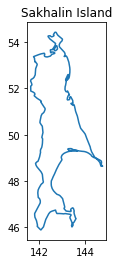

In [26]:
from pylab import *
plot(contour_sakhalin[:,0], contour_sakhalin[:,1])
gca().set_aspect('equal')
title('Sakhalin Island')
show()

The contour of the shapefile -- a coastline -- consist of 835 points.

In [27]:
contour_sakhalin.shape

(835, 2)

Bounding box of the shapefile is easily accessable from shapefile specification

In [28]:
sakhalin_shp.bbox

[141.63803100585938, 45.88860321044922, 144.75164794921875, 54.424713134765625]

Lets build a search url, according to previous steps:

In [29]:
query_sakhalin_bbox = tuple(zip(['lonl', 'latl', 'lonu', 'latu'], map(str, sakhalin_shp.bbox)))
print(query_sakhalin_bbox)

(('lonl', '141.63803100585938'), ('latl', '45.88860321044922'), ('lonu', '144.75164794921875'), ('latu', '54.424713134765625'))


In [30]:
within_sakhalin_request_url = HERBARIUM_SEARCH_URL + '?' + '&'.join(map(lambda x: x[0] + '=' + quote(x[1].strip()), query_sakhalin_bbox))

In [31]:
within_sakhalin_request_url  #it is good to inspect an url before sending a request

'http://botsad.ru/hitem/json/?lonl=141.63803100585938&latl=45.88860321044922&lonu=144.75164794921875&latu=54.424713134765625'

Getting data within Sakhalin Island bounding box:

In [32]:
server_response = urlopen(within_sakhalin_request_url)
sakhalin_data_in_bbox = pd.DataFrame(json.loads(server_response.read().decode('utf-8'))['data'])

Next step assumes applying a fine filtering with help of the `Polygon` class instance:

In [33]:
from shapely.geometry import Polygon, Point
closed_sakhalin_contour = np.vstack([contour_sakhalin, contour_sakhalin[-1]]) # Polygon should be closed to check inclusions
sakhalin_poly = Polygon(closed_sakhalin_contour)

In [34]:
sakhalin_filtered = sakhalin_data_in_bbox[[sakhalin_poly.contains(Point(x,y)) for x,y in zip(sakhalin_data_in_bbox.longitude, sakhalin_data_in_bbox.latitude)]]

In [35]:
sakhalin_filtered

,acronym,additionals,altitude,branch,collection_finished,collection_started,collectors,country,country_id,created,...,latitude,longitude,note,region,species_authorship,species_epithet,species_fullname,species_id,species_status,updated
0,VBGI,[],792,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,46.987425,142.830981,,Сахалинская обл.,F.Schmidt,ssiori,Prunus ssiori F.Schmidt,506834,From plantlist,2017-06-13
1,VBGI,[],1042,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,47.005332,142.840491,,Сахалинская обл.,Nakai,axillare,Vaccinium axillare Nakai,225901,From plantlist,2017-06-13
2,VBGI,[],792,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,46.987425,142.830981,,Сахалинская обл.,F.Schmidt,rugosa,Ilex rugosa F.Schmidt,44334,From plantlist,2017-06-13
3,VBGI,[],1042,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,47.005332,142.840491,,Сахалинская обл.,(Koidz.) H.Ohba,nipponica,Cerasus nipponica (Koidz.) H.Ohba,499916,From plantlist,2017-06-13
4,VBGI,[],1042,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,47.005332,142.840491,,Сахалинская обл.,(Cham. & Schltdl.) M.Roem.,sambucifolia,Sorbus sambucifolia (Cham. & Schltdl.) M.Roem.,518523,From plantlist,2017-06-13
5,VBGI,[],1042,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,47.005332,142.840491,,Сахалинская обл.,A.Gray,smallii,Vaccinium smallii A.Gray,226494,From plantlist,2017-06-13
6,VBGI,[],792,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,46.987425,142.830981,,Сахалинская обл.,Jancz.,latifolium,Ribes latifolium Jancz.,251865,From plantlist,2017-06-13
7,VBGI,[],1042,,,2016-10-01,Пименова Е.А.,Russia,162,2017-01-16,...,47.005332,142.840491,,Сахалинская обл.,Hult‚n,beauverdiana,Spiraea beauverdiana Hult‚n,518694,From plantlist,2017-06-13
8,VBGI,[],192,,,2016-09-29,Пименова Е.А.,Russia,162,2017-01-16,...,47.075517,142.614182,,Сахалинская обл.,Cham.,ermanii,Betula ermanii Cham.,68288,From plantlist,2017-06-13
9,VBGI,[],192,,,2016-09-29,Пименова Е.А.,Russia,162,2017-01-16,...,47.075517,142.614182,,Сахалинская обл.,Cham.,ermanii,Betula ermanii Cham.,68288,From plantlist,2017-06-13


In [36]:
sakhalin_data_in_bbox.shape

(206, 36)

Now, we will find ID's of points belonging to bounding box of Sakhalin Island, but not to its countour (coastline)  defined in the shapefile.

In [37]:
set(sakhalin_data_in_bbox.id.values) - set(sakhalin_filtered.id.values)

{1403,
 1412,
 1432,
 1434,
 1438,
 1439,
 1529,
 10015,
 10016,
 10373,
 19820,
 19823,
 19912,
 20830,
 20832}

Inspecting positions of the filtered points, e.g. ID=1412 (see http://botsad.ru/hitem/1412), one can conclude
that all filtered records were collected near the coastline; this is probably caused by errors in herbarium records and coastline points positioning.So, that isn't a true error, but such cases should be taken in mind when do filtering by polygonal areas.

Lets find herbarium records collected in the proximity of Petropavlovsk-Kamchatsky city.
Firstly, we will set coordinates of Petropavlovsk-Kamchatsky and define a bounding box that includes 200-km circle around this point:

In [38]:
kamchatka_bbox = [151.1, 47.8, 172.0, 58.3]
petropavlovsk_coords = (53.145992, 158.683548)

The Earth shape isn't a prefect sphere, so we will need an additional tool that provides a function to get estimation of distances between geographically distributed points.
`Geopy` package provides necessary functionality to do distance computation.

In [39]:
from geopy.distance import vincenty
query_kamchatka_bbox = tuple(zip(['lonl', 'latl', 'lonu', 'latu'], map(str, kamchatka_bbox)))
near_petropavlovsk_kamchatsky_url = HERBARIUM_SEARCH_URL + '?' + '&'.join(map(lambda x: x[0] + '=' + quote(x[1].strip()), query_kamchatka_bbox))
server_response = urlopen(near_petropavlovsk_kamchatsky_url)
petropavlovsk_data_in_bbox = pd.DataFrame(json.loads(server_response.read().decode('utf-8'))['data'])
petropavlovsk_data_in_bbox.shape

(148, 36)

In [40]:
petropavlovsk_filtered = petropavlovsk_data_in_bbox[[vincenty((lat, lon), petropavlovsk_coords).km < 200.0 for lat,lon in zip(petropavlovsk_data_in_bbox.latitude, petropavlovsk_data_in_bbox.longitude)]]

In [41]:
petropavlovsk_filtered.shape

(61, 36)

When the datasets are obtained, we can carry out some investigaions (e.g. comparison analysis):

In [42]:
print('The number of unique genera in 200 km circle around the Petropavlovsk-Kamchatsky city:', len(petropavlovsk_filtered.genus.unique()))

The number of unique genera in 200 km circle around the Petropavlovsk-Kamchatsky city: 16


In [43]:
print('The number of unique species in 200-km circle around the Petropavlovsk-Kamchatsky city:', len(petropavlovsk_filtered.species_id.unique()))

The number of unique species in 200-km circle around the Petropavlovsk-Kamchatsky city: 19


In [44]:
print('The number of unique genera at Sakhalin Island:', len(sakhalin_filtered.species_id.unique()))

The number of unique genera at Sakhalin Island: 92


In [45]:
print('The number of unique species at Sakhalin Island:', len(sakhalin_filtered.genus.unique()))

The number of unique species at Sakhalin Island: 72


Lets count frequences:

In [46]:
from collections import Counter

Genera frequences near the Petropavlovsk-Kamchatsky city

In [47]:
petropavlovsk_freq = petropavlovsk_filtered.genus.value_counts() / len(petropavlovsk_filtered)
petropavlovsk_freq

Riccardia       0.147541
Aneura          0.147541
Moerckia        0.114754
Peltolepis      0.098361
Conocephalum    0.081967
Calycularia     0.065574
Pellia          0.049180
Sauteria        0.049180
Preissia        0.049180
Marchantia      0.049180
Athyrium        0.032787
Polystichum     0.032787
Blasia          0.032787
Mannia          0.016393
Nardia          0.016393
Cystopteris     0.016393
Name: genus, dtype: float64

Genera frequences at Sakhalin Island:

In [48]:
sakhalin_freq = sakhalin_filtered.genus.value_counts() / len(sakhalin_filtered)
sakhalin_freq

Riccardia         0.109948
Conocephalum      0.094241
Asarum            0.062827
Dryopteris        0.041885
Marchantia        0.036649
Woodsia           0.031414
Sauteria          0.031414
Reboulia          0.026178
Leptorumohra      0.026178
Asterella         0.026178
Peltolepis        0.026178
Cacalia           0.020942
Prunus            0.020942
Euonymus          0.015707
Cypripedium       0.015707
Cardamine         0.015707
Gentiana          0.015707
Skimmia           0.015707
Phellodendron     0.015707
Blasia            0.010471
Juglans           0.010471
Metzgeria         0.010471
Pellia            0.010471
Betula            0.010471
Cortusa           0.010471
Actinidia         0.010471
Fossombronia      0.010471
Vaccinium         0.010471
Porella           0.010471
Lupinus           0.010471
                    ...   
Galium            0.005236
Sanguisorba       0.005236
Hydrangea         0.005236
Brylkinia         0.005236
Hierochloe        0.005236
Sorbus            0.005236
R

Shannon's informational measures:

In [49]:
shannon_sakhalin = - sum(np.log2(sakhalin_freq.values) * sakhalin_freq.values)
shannon_sakhalin

5.4624770621365091

In [50]:
shannon_petropavlovsk = - sum(np.log2(petropavlovsk_freq.values) * petropavlovsk_freq.values)
shannon_petropavlovsk

3.6873094692385835

Relative values of informational measures (relative to its theoretically maximal value):

In [51]:
shannon_sakhalin_relative = shannon_sakhalin / np.log2(len(sakhalin_freq))
shannon_sakhalin_relative

0.88533929680823886

In [52]:
shannon_petropavlovsk_relative = shannon_petropavlovsk / np.log2(len(petropavlovsk_freq))
shannon_petropavlovsk_relative

0.92182736730964587

**Note:** One can be confused looking at the results: genus diversity near the Petropavlovsk-Kamchatsky city is greater than in Sakhalin Island; this could be caused by lots of impacts -- such as Herbarium database filling pecularities (the database filling is still in progress...) and just by a statistical ambiguity; records in the database are collected and filled out in a non-random and/or non-regular way that, in turn, may lead to fake conclusions. So, be careful making any conclusions... 

In [53]:
import datetime
print("Date of last code execution: ", datetime.datetime.now())

Date of last code execution:  2017-07-23 21:43:57.728833
